In [1]:
import math
from math import sqrt
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# ex 1
def f1(x):
    """pentru a aproxima sqrt(5):
    x = sqrt(5)
    x**2 = 5
    x**2 - 5 = 0
    """
    return x**2 - 5

def fderiv(x): # derivata functiei
    return 2*x

def metoda_newton(f, fderiv, xk_1, epsilon):
    N = 0
    # algoritmul
    xk = xk_1 - f(xk_1) / fderiv(xk_1) # prima iteratie
    
    while (abs(xk - xk_1) / abs(xk_1)) >= epsilon: # calculez pana am precizia ceruta
        xk_1 = xk
        xk = xk_1 - f(xk_1) / fderiv(xk_1)
        N += 1
    return xk, N #n nr iteratii

epsilon = 1e-5 # 10^(-5)
x = 5

x0, N = metoda_newton(f1, fderiv, x, epsilon)
print("ex 1\no aproximare a valorii √5 cu o precizie de 7 zecimale:") 
print("solutia a fost gasita in", N, "iteratii")
print("sqrt", x, "=", x0)
print("aproximarea valorii x0 cu o precizie de 7 zecimale este ",'{:.7f}'.format(x0))

ex 1
o aproximare a valorii √5 cu o precizie de 7 zecimale:
solutia a fost gasita in 4 iteratii
sqrt 5 = 2.236067977499978
aproximarea valorii x0 cu o precizie de 7 zecimale este  2.2360680


Punctul de intersectie al celor 2 functii are coordonatele: 2.2495352010859757 1.2834287417461598
Punctul de intersectie al celor 2 functii are coordonatele: 2.2495460510253906 1.2834426669457948


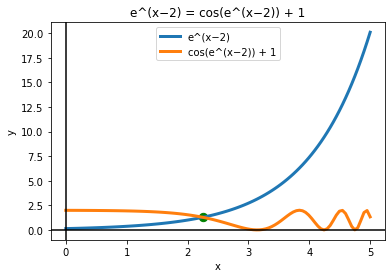

In [3]:
# ex 2
""" 
f(x) = e^(x−2)
g(x) = cos(e^(x−2)) + 1
h(x) = f(x) - g(x) = e^(x−2) - cos(e^(x−2)) - 1
h'(x) = e^(x−2) + sin(e^(x−2))*e^(x−2)

"""
def f(x):
    return math.exp(x-2)
def g(x):
    return math.cos(math.exp(x-2)) + 1
def h(x):
    return math.exp(x-2) - math.cos(math.exp(x-2)) - 1 # # e^(x−2)
def hderiv(x):
    return math.exp(x-2) + math.sin(math.exp(x-2)) * math.exp(x-2)
def metoda_bisectiei (f, a, b, epsilon):
    #calculez f de capete
    fa = f(a)
    fb = f(b)
    #semnele trb sa fie diferite
    assert fa*fb < 0
    #mijlocul intervalului initial
    xnum = (a + b) / 2
    #nr iteratii
    N = int(np.floor(np.log2((b-a)/epsilon) - 1))
    #algoritmul
    for i in range(N):
        fx = f(xnum)
        if fx == 0: #am gasit valoarea cautata, ies
            break
        elif f(a) * fx < 0:
            b = xnum
        else:
            a = xnum
        xnum = (a + b) / 2
    return xnum

value = 2 # punctul de pornire
x0, N = metoda_newton(h, hderiv, value, epsilon)
print("Punctul de intersectie al celor 2 functii are coordonatele:", x0, f(x0))
x1 = metoda_bisectiei(h, 0, 5, epsilon)
print("Punctul de intersectie al celor 2 functii are coordonatele:", x1, f(x1))

x = np.linspace(0, 5, 100) # Discretizare a intervalului (0,100)/ generare puncte
y1 = np.vectorize(f)(x) #f(x)
y2 = np.vectorize(g)(x) #g(x)

plt.figure(0)
plt.plot(x, y1, linestyle = '-', linewidth = 3) #desenez graficul functiei f
plt.plot(x, y2, linestyle = '-', linewidth = 3) #desenez graficul functiei g

plt.scatter(x0, f(x0), s=70, c='green', marker='o') # desenez punctul de intersectie

plt.legend(['e^(x−2)', 'cos(e^(x−2)) + 1']) # Adauga legenda

plt.axvline(0, c='black') # Adauga axa OY
plt.axhline(0, c='black') # Adauga axa OX

plt.xlabel('x') # Label pentru axa OX
plt.ylabel('y') # Label pentru axa OY

plt.title('e^(x−2) = cos(e^(x−2)) + 1') # Titlul figurii

plt.show() # Arata graficul

Solutiile sunt:
x0= -3.999994386642991 obtinuta in 10 iteratii
x1= -0.0 obtinuta in 187 iteratii
x2= 2.9999686229978404 obtinuta in 17 iteratii


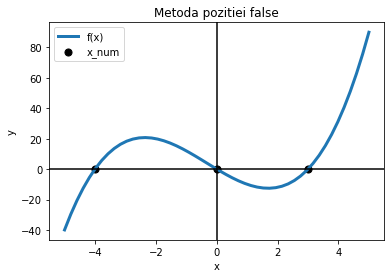

In [4]:
#ex 3
#a
def PozitieFalsa(f, a, b, epsilon):
    k = 0
    x = (a * f(b) - b * f(a)) / (f(b) - f(a)) # prima iteratie
    
    while True:
        k += 1
        if f(x) == 0: # am gasit solutia 
            return x, k
            break
        #actualizez capetele intervalului
        if f(a) * f(x) < 0: 
            b = x
        else:
            a = x
        xk = (a * f(b) - b * f(a)) / (f(b) - f(a))
        if (abs(xk - x) / abs(x)) < epsilon:  #am precizia ceruta
            break
        x = xk
        
    return xk, k

# b
def f3(x):
    return x**3 + x**2 - 12 * x

a, b = -5, 5 # intervalul dat
epsilon = 10**(-5) # toleranta erorii
"""
impartirea in cele 3 intervale s a facut in felul urm:
am calculcat f'(x) = 3*x**2 + 2* x - 12
f'(x) = 0 ---> x1,2 = (-2 +- sqrt(148))/6 puncte de min,max local
intervalul 1 este [ a; (-2 - sqrt(148))/6 ], a = -5
intervalul 2 cel "mare" prezinta o parte concava si una convexa, asa ca am calculat derivata a 2a f"(x) = 6*2 + 2.
calculand f"(x) = 0 obtin x = -1/3 punct inflexiune si aleg intervalul [ -1/3; (-2 + sqrt(148)) / 6 ]
intervalul 3 este [ (-2 + sqrt(148)) / 6; b ], b = -5
"""
x0, n0 = PozitieFalsa(f3, a, (-2 - sqrt(148)) / 6, epsilon)
x1, n1 = PozitieFalsa(f3, -1/3, (-2 + sqrt(148)) / 6, epsilon) 
x2, n2 = PozitieFalsa(f3, (-2 + sqrt(148)) / 6, b, epsilon)

solutii = [x0, x1, x2] # vector cu solutii, pt afisare
iteratii = [n0, n1, n2] # iteratiile

print("Solutiile sunt:")
for i in range (len(solutii)):
    print("x" + str(i) + "=", solutii[i], "obtinuta in", iteratii[i], "iteratii" ) 
    
x = np.linspace(a, b, 50) # Discretizare a intervalului (A,B)/ generare puncte
y = f3(x)

plt.figure(0)
plt.plot(x, y, linestyle = '-', linewidth = 3) #desenez graficul functiei

# 0 = f(solutie)
plt.scatter([x0, x1, x2], [0] * len(solutii), s=50, c='black', marker='o') # solutiile

plt.legend(['f(x)', 'x_num']) # Adauga legenda

plt.axvline(0, c='black') # Adauga axa OY
plt.axhline(0, c='black') # Adauga axa OX

plt.xlabel('x') # Label pentru axa OX
plt.ylabel('y') # Label pentru axa OY

plt.title('Metoda pozitiei false') # Titlul figurii

plt.show() # Arata graficul

Solutiile sunt:
x0= -4.000000002964523 obtinuta in 6 iteratii
x1= -0.0 obtinuta in 8 iteratii
x2= 3.0000000005436003 obtinuta in 7 iteratii


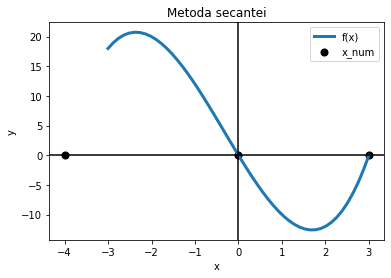

In [5]:
# ex 4
# a
def Secanta(f, a, b, eps):
    k = 1
    x0 = a # initial iau capetele intervalului
    x1 = b
    while abs(x1 - x0) / abs (x0) >= eps:  # calculez pana am precizia ceruta
        if f(x1) == 0: # am gasit solutia 
            break
        k += 1
        x = (x0 * f(x1) - x1 * f(x0)) / (f(x1) - f(x0))
        
        if x < a or x > b:
            print('introduceti alte valori pt x0 si x1')
            return None, k
            break
            
        x0 = x1 # actualizare puncte
        x1 = x
    return x1, k

# b
a, b = -3, 3 # intervalul dat
epsilon = 10**(-5) # toleranta erorii

x0, n0 = Secanta(f3, -4.5, -3.5, epsilon) 
x1, n1 = Secanta(f3, -1, 0.5, epsilon)
x2, n2 = Secanta(f3, 1, 3.2, epsilon) #(-2 + sqrt(148)) / 6

# -4, 0, 3
solutii = [x0, x1, x2] # vector cu solutii, pt afisare
iteratii = [n0, n1, n2] # iteratiile

print("Solutiile sunt:")
for i in range (len(solutii)):
    print("x" + str(i) + "=", solutii[i], "obtinuta in", iteratii[i], "iteratii" ) 
    
x = np.linspace(a, b, 50) # Discretizare a intervalului (A,B)/ generare puncte
y = f3(x)

plt.figure(0)
plt.plot(x, y, linestyle = '-', linewidth = 3) #desenez graficul functiei

# 0 = f(solutie)
plt.scatter([x0, x1, x2], [0] * len(solutii), s=50, c='black', marker='o') # solutiile

plt.legend(['f(x)', 'x_num']) # Adauga legenda

plt.axvline(0, c='black') # Adauga axa OY
plt.axhline(0, c='black') # Adauga axa OX

plt.xlabel('x') # Label pentru axa OX
plt.ylabel('y') # Label pentru axa OY

plt.title('Metoda secantei') # Titlul figurii

plt.show() # Arata graficul